In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df = pd.read_excel("board2.xlsx")
df

,Name,Gender,Track,Hometown,Math,Electronics,GEAS,Communication
0,S1,Male,Instrumentation,Luzon,58,89,75,78
1,S2,Female,Communication,Mindanao,52,75,90,52
2,S3,Female,Instrumentation,Mindanao,83,74,77,57
3,S4,Male,Instrumentation,Visayas,65,58,91,68
4,S5,Male,Communication,Luzon,59,86,43,88
5,S6,Female,Microelectronics,Visayas,88,45,86,83
6,S7,Female,Instrumentation,Luzon,66,60,60,48
7,S8,Male,Instrumentation,Luzon,49,81,64,53
8,S9,Male,Instrumentation,Luzon,50,36,63,42
9,S10,Male,Microelectronics,Mindanao,80,84,61,44


In [14]:
df.to_csv("board2.csv", index=False)

In [15]:
df.head()

,Name,Gender,Track,Hometown,Math,Electronics,GEAS,Communication
0,S1,Male,Instrumentation,Luzon,58,89,75,78
1,S2,Female,Communication,Mindanao,52,75,90,52
2,S3,Female,Instrumentation,Mindanao,83,74,77,57
3,S4,Male,Instrumentation,Visayas,65,58,91,68
4,S5,Male,Communication,Luzon,59,86,43,88


In [17]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           30 non-null     object
 1   Gender         30 non-null     object
 2   Track          30 non-null     object
 3   Hometown       30 non-null     object
 4   Math           30 non-null     int64 
 5   Electronics    30 non-null     int64 
 6   GEAS           30 non-null     int64 
 7   Communication  30 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 2.0+ KB


Name             0
Gender           0
Track            0
Hometown         0
Math             0
Electronics      0
GEAS             0
Communication    0
dtype: int64

In [18]:
Vis = df[(df["Hometown"] == "Visayas") & (df["Math"] < 70)][["Name", "Gender", "Track", "Math"]]

In [19]:
Vis.head()

,Name,Gender,Track,Math
3,S4,Male,Instrumentation,65
10,S11,Female,Communication,48
21,S22,Female,Communication,64


In [20]:
Instru = df[(df["Track"] == "Instrumentation") &
            (df["Hometown"] == "Luzon") &
            (df["Electronics"] > 70)][["Name", "GEAS", "Electronics"]]
Instru.head()

,Name,GEAS,Electronics
0,S1,75,89
7,S8,64,81
29,S30,57,81


In [23]:
print(df.columns.tolist())

['Name', 'Gender', 'Track', 'Hometown', 'Math', 'Electronics', 'GEAS', 'Communication']


In [24]:
df.columns = df.columns.str.strip()

In [26]:
grade_cols = ['Math', 'GEAS', 'Electronics', 'Communication']
missing = [c for c in grade_cols if c not in df.columns]
if missing:
    print("WARNING: These expected grade columns are missing:", missing)

# 3) Convert grade columns to numeric (coerce non-numeric -> NaN)
for c in grade_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors='coerce')

# 4) Compute Average if it doesn't exist (mean over the grade columns that actually exist)
existing_grades = [c for c in grade_cols if c in df.columns]
df['Average'] = df[existing_grades].mean(axis=1)

# 5) Normalize text columns to avoid stray spaces/case issues
df['Hometown_norm'] = df['Hometown'].astype(str).str.strip().str.lower()
df['Gender_norm']   = df['Gender'].astype(str).str.strip().str.lower()

# 6) Debug prints to inspect unique values (helps catch typos)
print("\nUnique hometowns:", sorted(df['Hometown_norm'].unique()))
print("Unique genders:", sorted(df['Gender_norm'].unique()))
print("Sample averages (first 8):\n", df['Average'].head(8))

# 7) Build Mindy filter (mindanao + female + average >= 55)
Mindy = df.loc[
    (df['Hometown_norm'] == 'mindanao') &
    (df['Gender_norm'] == 'female') &
    (df['Average'] >= 55),
    ['Name', 'Track', 'Electronics', 'Average']
]

print("\nMindy shape:", Mindy.shape)
display(Mindy.head(20))   # use display in notebook for nice table


Unique hometowns: ['luzon', 'mindanao', 'visayas']
Unique genders: ['female', 'male']
Sample averages (first 8):
 0    75.00
1    67.25
2    72.75
3    70.50
4    69.00
5    75.50
6    58.50
7    61.75
Name: Average, dtype: float64

Mindy shape: (5, 4)


,Name,Track,Electronics,Average
1,S2,Communication,75,67.25
2,S3,Instrumentation,74,72.75
14,S15,Microelectronics,41,59.00
16,S17,Microelectronics,79,70.50
19,S20,Communication,60,66.50


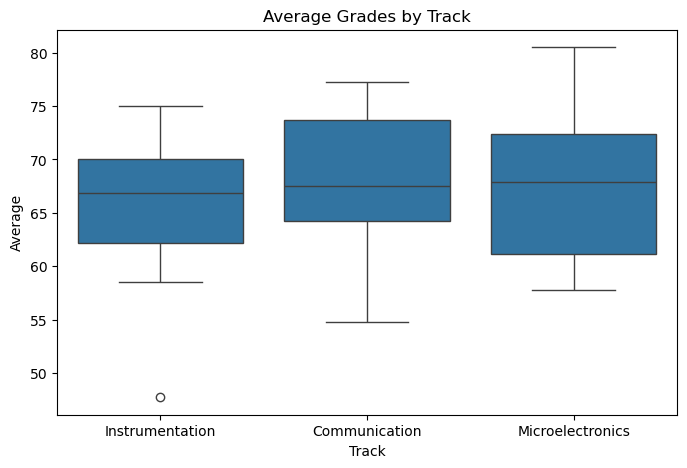

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Track", y="Average", data=df)
plt.title("Average Grades by Track")
plt.show()

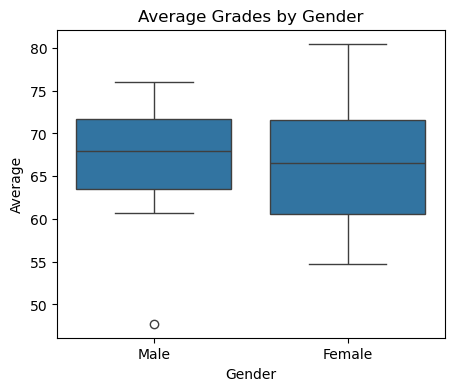

In [28]:
plt.figure(figsize=(5,4))
sns.boxplot(x="Gender", y="Average", data=df)
plt.title("Average Grades by Gender")
plt.show()

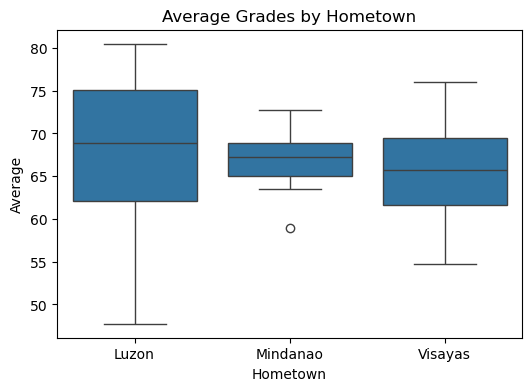

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x="Hometown", y="Average", data=df)
plt.title("Average Grades by Hometown")
plt.show()

From the boxplot, we see that Instrumentation students have the highest median average, followed by Communication students. The spread of grades is narrower in Instrumentation, meaning performance is more consistent.

This suggests that Track has a clear effect on average grade. Choosing Instrumentation may be correlated with better performance in the ECE Board Exam dataset.

The medians for Male and Female students are almost the same, with slightly more variation in one gender (depending on your plot).

Gender does not appear to significantly affect the average score, as both distributions overlap considerably.

The averages of students from Luzon, Visayas, and Mindanao are very close, with only minor differences in spread.

Hometown does not show a strong effect on average grade based on this dataset.